In [1]:
#Import required libraries
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
#Define and load file 
salaries_path = "data/Salaries.csv"
salaries = pd.read_csv(salaries_path)

#Display sample data 
salaries.head()

/var/folders/zq/5_ydv5613ml2p2l82yrw54980000gn/T/ipykernel_43634/1813114643.py:3: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  salaries = pd.read_csv(salaries_path)


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [3]:
unique_years = salaries['Year'].unique()
unique_years

array([2011, 2012, 2013, 2014])

In [4]:
df_2011 = salaries[salaries['Year'] == 2011]
df_2011

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36154,36155,SERENA HUGHES,SWIMMING INSTRUCTOR/POOL LIFEGUARD,0.0,0.0,4.17,NaN,4.17,4.17,2011,NaN,San Francisco,NaN
36155,36156,JOE BROWN JR,TRANSIT OPERATOR,0.0,0.0,0.3,NaN,0.30,0.30,2011,NaN,San Francisco,NaN
36156,36157,PAULETTE ADAMS,"STATIONARY ENGINEER, WATER TREATMENT PLANT",0.0,0.0,0.0,NaN,0.00,0.00,2011,NaN,San Francisco,NaN
36157,36158,KAUKAB MOHSIN,TRANSIT OPERATOR,0.0,0.0,0.0,NaN,0.00,0.00,2011,NaN,San Francisco,NaN


In [6]:
df_2011.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36159 entries, 0 to 36158
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                36159 non-null  int64  
 1   EmployeeName      36159 non-null  object 
 2   JobTitle          36159 non-null  object 
 3   BasePay           36159 non-null  object 
 4   OvertimePay       36159 non-null  object 
 5   OtherPay          36159 non-null  object 
 6   Benefits          0 non-null      object 
 7   TotalPay          36159 non-null  float64
 8   TotalPayBenefits  36159 non-null  float64
 9   Year              36159 non-null  int64  
 10  Notes             0 non-null      float64
 11  Agency            36159 non-null  object 
 12  Status            0 non-null      object 
dtypes: float64(3), int64(2), object(8)
memory usage: 3.9+ MB


In [7]:
df_2011['BasePay'] = pd.to_numeric(df_2011['BasePay'], errors='coerce')
df_2011['OvertimePay'] = pd.to_numeric(df_2011['OvertimePay'], errors='coerce')
df_2011['OtherPay'] = pd.to_numeric(df_2011['OtherPay'], errors='coerce')
df_2011['Benefits'] = pd.to_numeric(df_2011['Benefits'], errors='coerce')

/var/folders/zq/5_ydv5613ml2p2l82yrw54980000gn/T/ipykernel_43634/446147727.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2011['BasePay'] = pd.to_numeric(df_2011['BasePay'], errors='coerce')
/var/folders/zq/5_ydv5613ml2p2l82yrw54980000gn/T/ipykernel_43634/446147727.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2011['OvertimePay'] = pd.to_numeric(df_2011['OvertimePay'], errors='coerce')
/var/folders/zq/5_ydv5613ml2p2l82yrw54980000gn/T/ipykernel_43634/446147727.py:3: SettingWithCopyWarning: 


In [9]:
num_rows = df_2011.shape[0]
print(f'The number of rows in the 2011 dataframe is : {num_rows}')

The number of rows in the 2011 dataframe is : 36159


In [10]:
nan_count_id = df_2011['Id'].isna().sum()
nan_count_name = df_2011['EmployeeName'].isna().sum()
nan_count_job = df_2011['JobTitle'].isna().sum()
nan_count_base = df_2011['BasePay'].isna().sum()
nan_count_overtime = df_2011['OvertimePay'].isna().sum()
nan_count_other = df_2011['OtherPay'].isna().sum()
nan_count_benefits = df_2011['Benefits'].isna().sum()
nan_count_total = df_2011['TotalPay'].isna().sum()
nan_count_tpb = df_2011['TotalPayBenefits'].isna().sum()
nan_count_year = df_2011['Year'].isna().sum()
nan_count_notes = df_2011['Notes'].isna().sum()
nan_count_agency = df_2011['Agency'].isna().sum()
nan_count_status = df_2011['Status'].isna().sum()

In [11]:
print(f'Total NaN for ID: {nan_count_id}')
print(f'Total NaN for EmployeeName: {nan_count_name}')
print(f'Total NaN for JobTitle: {nan_count_job}')
print(f'Total NaN for BasePay: {nan_count_base}')
print(f'Total NaN for OvertimePay: {nan_count_overtime}')
print(f'Total NaN for OtherPay: {nan_count_other}')
print(f'Total NaN for Benefits: {nan_count_benefits}')
print(f'Total NaN for TotalPay: {nan_count_total}')
print(f'Total NaN for TotalPayBenefits: {nan_count_tpb}')
print(f'Total NaN for Year: {nan_count_year}')
print(f'Total NaN for Notes: {nan_count_notes}')
print(f'Total NaN for Agency: {nan_count_agency}')
print(f'Total NaN for Status: {nan_count_status}')

Total NaN for ID: 0
Total NaN for EmployeeName: 0
Total NaN for JobTitle: 0
Total NaN for BasePay: 0
Total NaN for OvertimePay: 0
Total NaN for OtherPay: 0
Total NaN for Benefits: 36159
Total NaN for TotalPay: 0
Total NaN for TotalPayBenefits: 0
Total NaN for Year: 0
Total NaN for Notes: 36159
Total NaN for Agency: 0
Total NaN for Status: 36159


In [12]:
agency_is_sf = (df_2011['Agency'] == 'San Francisco').sum()
print(f'The number of rows that contain San Francisco in the Agency column is: {agency_is_sf}')

The number of rows that contain San Francisco in the Agency column is: 36159


In [13]:
df_2011 = df_2011.drop('Benefits', axis = 1)
df_2011 = df_2011.drop('Notes', axis = 1)
df_2011 = df_2011.drop('Status', axis = 1)
df_2011 = df_2011.drop('Year', axis = 1)
df_2011 = df_2011.drop('Id', axis = 1)
df_2011 = df_2011.drop('EmployeeName', axis = 1)
df_2011 = df_2011.drop('Agency', axis = 1)
df_2011 = df_2011.drop('TotalPayBenefits', axis = 1)

In [14]:
df_2011

,JobTitle,BasePay,OvertimePay,OtherPay,TotalPay
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,567595.43
1,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,538909.28
2,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,335279.91
3,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,332343.61
4,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,326373.19
...,...,...,...,...,...
36154,SWIMMING INSTRUCTOR/POOL LIFEGUARD,0.00,0.00,4.17,4.17
36155,TRANSIT OPERATOR,0.00,0.00,0.30,0.30
36156,"STATIONARY ENGINEER, WATER TREATMENT PLANT",0.00,0.00,0.00,0.00
36157,TRANSIT OPERATOR,0.00,0.00,0.00,0.00


In [15]:
not_provided_job = (df_2011['JobTitle'] == 'Not Provided').sum()
not_provided_base = (df_2011['BasePay'] == 'Not Provided').sum()
not_provided_overtime = (df_2011['OvertimePay'] == 'Not Provided').sum()
not_provided_other = (df_2011['OtherPay'] == 'Not Provided').sum()
not_provided_total = (df_2011['TotalPay'] == 'Not Provided').sum()

In [16]:
print(f'Total Not Provided for JobTitle: {not_provided_job}')
print(f'Total Not Provided for BasePay: {not_provided_base}')
print(f'Total Not Provided for OvertimePay: {not_provided_overtime}')
print(f'Total Not Provided for OtherPay: {not_provided_other}')
print(f'Total Not Provided for TotalPay: {not_provided_total}')

Total Not Provided for JobTitle: 0
Total Not Provided for BasePay: 0
Total Not Provided for OvertimePay: 0
Total Not Provided for OtherPay: 0
Total Not Provided for TotalPay: 0


In [18]:
df_2011.describe()

,BasePay,OvertimePay,OtherPay,TotalPay
count,36159.000000,36159.000000,36159.000000,36159.000000
mean,63595.956517,4531.065429,3617.081926,71744.103871
std,40556.774993,10501.367793,7959.889157,47498.706594
min,0.000000,0.000000,0.000000,0.000000
25%,33468.125000,0.000000,0.000000,36810.760000
50%,62871.720000,0.000000,795.600000,68213.240000
75%,90649.765000,4215.040000,4057.730000,102512.680000
max,294580.020000,245131.880000,400184.250000,567595.430000


In [18]:
total_pay = df_2011['TotalPay']

quarantiles = total_pay.quantile([0.25, 0.5, 0.75])
lower_q = quarantiles[0.25]
upper_q = quarantiles[0.75]
iqr = upper_q - lower_q

print(f'The lower quarantile is: {lower_q}')
print(f'The upper quarantile is: {upper_q}')
print(f'The interquarantile range is: {iqr}')
print(f'The median is: {quarantiles[0.5]}')

lower_bound = lower_q - (1.5*iqr)
upper_bound = upper_q + (1.5*iqr)

print(f'If the pay value is below {lower_bound}, they may be outliers')
print(f'If the pay value is above {upper_bound}, they may be outliers')

The lower quarantile is: 36810.76
The upper quarantile is: 102512.68
The interquarantile range is: 65701.91999999998
The median is: 68213.24
If the pay value is below -61742.11999999997, they may be outliers
If the pay value is above 201065.55999999997, they may be outliers


In [19]:
base_pay = df_2011['BasePay']

quarantiles = base_pay.quantile([0.25, 0.5, 0.75])
lower_q = quarantiles[0.25]
upper_q = quarantiles[0.75]
iqr = upper_q - lower_q

print(f'The lower quarantile is: {lower_q}')
print(f'The upper quarantile is: {upper_q}')
print(f'The interquarantile range is: {iqr}')
print(f'The median is: {quarantiles[0.5]}')

lower_bound = lower_q - (1.5*iqr)
upper_bound = upper_q + (1.5*iqr)

print(f'If the pay value is below {lower_bound}, they may be outliers')
print(f'If the pay value is above {upper_bound}, they may be outliers')

The lower quarantile is: 33468.125
The upper quarantile is: 90649.765
The interquarantile range is: 57181.64
The median is: 62871.72
If the pay value is below -52304.33499999999, they may be outliers
If the pay value is above 176422.22499999998, they may be outliers


In [20]:
overtime_pay = df_2011['OvertimePay']

quarantiles = overtime_pay.quantile([0.25, 0.5, 0.75])
lower_q = quarantiles[0.25]
upper_q = quarantiles[0.75]
iqr = upper_q - lower_q

print(f'The lower quarantile is: {lower_q}')
print(f'The upper quarantile is: {upper_q}')
print(f'The interquarantile range is: {iqr}')
print(f'The median is: {quarantiles[0.5]}')

lower_bound = lower_q - (1.5*iqr)
upper_bound = upper_q + (1.5*iqr)

print(f'If the pay value is below {lower_bound}, they may be outliers')
print(f'If the pay value is above {upper_bound}, they may be outliers')

The lower quarantile is: 0.0
The upper quarantile is: 4215.04
The interquarantile range is: 4215.04
The median is: 0.0
If the pay value is below -6322.5599999999995, they may be outliers
If the pay value is above 10537.599999999999, they may be outliers


In [21]:
other_pay = df_2011['OtherPay']

quarantiles = other_pay.quantile([0.25, 0.5, 0.75])
lower_q = quarantiles[0.25]
upper_q = quarantiles[0.75]
iqr = upper_q - lower_q

print(f'The lower quarantile is: {lower_q}')
print(f'The upper quarantile is: {upper_q}')
print(f'The interquarantile range is: {iqr}')
print(f'The median is: {quarantiles[0.5]}')

lower_bound = lower_q - (1.5*iqr)
upper_bound = upper_q + (1.5*iqr)

print(f'If the pay value is below {lower_bound}, they may be outliers')
print(f'If the pay value is above {upper_bound}, they may be outliers')

The lower quarantile is: 0.0
The upper quarantile is: 4057.73
The interquarantile range is: 4057.73
The median is: 795.6
If the pay value is below -6086.595, they may be outliers
If the pay value is above 10144.325, they may be outliers


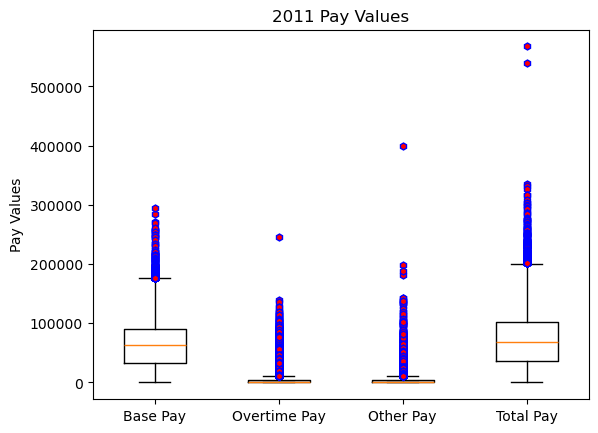

In [22]:
data_plotting = [base_pay, overtime_pay, other_pay, total_pay]
treatment = ['Base Pay', 'Overtime Pay', 'Other Pay', 'Total Pay']
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Pay Values")
plt.title("2011 Pay Values")
red_dot = dict(markerfacecolor="r", markersize = 5, marker="h", markeredgecolor="b")
ax1.boxplot(data_plotting, flierprops = red_dot, labels=treatment, widths = 0.5, vert = True)

plt.show()

In [23]:
#filtered_2011 = df_2011[df_2011['BasePay'] <= upper_q]

#filtered_2011 = filtered_2011[(filtered_2011['BasePay'] > 0) & 
#                          (filtered_2011['BasePay'] <= 176422.22499999998)]


In [24]:
#filtered_2011 = df_2011[df_2011['OvertimePay'] <= upper_q]

#filtered_2011 = filtered_2011[(filtered_2011['OvertimePay'] > 0) & 
#                          (filtered_2011['OvertimePay'] <= 10537.599999999999)]


In [25]:
#filtered_2011 = df_2011[df_2011['OtherPay'] <= upper_q]

#filtered_2011 = filtered_2011[(filtered_2011['OtherPay'] > 0) & 
#                          (filtered_2011['OtherPay'] <= 10144.325)]


In [26]:
#filtered_2011 = df_2011[df_2011['TotalPay'] <= upper_q]

#filtered_2011 = filtered_2011[(filtered_2011['TotalPay'] > 0) & 
#                          (filtered_2011['TotalPay'] <= 201065.55999999997)]


In [19]:
df_2011

,JobTitle,BasePay,OvertimePay,OtherPay,TotalPay
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,567595.43
1,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,538909.28
2,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,335279.91
3,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,332343.61
4,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,326373.19
...,...,...,...,...,...
36154,SWIMMING INSTRUCTOR/POOL LIFEGUARD,0.00,0.00,4.17,4.17
36155,TRANSIT OPERATOR,0.00,0.00,0.30,0.30
36156,"STATIONARY ENGINEER, WATER TREATMENT PLANT",0.00,0.00,0.00,0.00
36157,TRANSIT OPERATOR,0.00,0.00,0.00,0.00


In [28]:
cleaned_2011 = df_2011[df_2011['BasePay'] != 0]

In [29]:
cleaned_2011.reset_index()

,index,JobTitle,BasePay,OvertimePay,OtherPay,TotalPay
0,0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,567595.43
1,1,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,538909.28
2,2,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,335279.91
3,3,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,332343.61
4,4,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,326373.19
...,...,...,...,...,...,...
35702,36143,PUBLIC SERVICE TRAINEE,27.28,0.00,0.00,27.28
35703,36144,PUBLIC SERVICE TRAINEE,27.28,0.00,0.00,27.28
35704,36145,PUBLIC SERVICE TRAINEE,27.28,0.00,0.00,27.28
35705,36146,PUBLIC SERVICE TRAINEE,27.28,0.00,0.00,27.28


In [30]:
relative_counts = cleaned_2011['JobTitle'].value_counts(normalize=False)
relative_counts.head(50)

JobTitle
TRANSIT OPERATOR                                  2329
SPECIAL NURSE                                     1399
REGISTERED NURSE                                  1203
CUSTODIAN                                          789
FIREFIGHTER                                        786
POLICE OFFICER III                                 776
RECREATION LEADER                                  692
DEPUTY SHERIFF                                     683
MENTAL HEALTH REHABILITATION WORKER                551
PUBLIC SERVICE AIDE-SPECIAL PROGRAMS               531
POLICE OFFICER I                                   466
ATTORNEY (CIVIL/CRIMINAL)                          375
GENERAL LABORER                                    372
PORTER                                             362
POLICE OFFICER II                                  360
PUBLIC SERVICE TRAINEE                             327
LIBRARY PAGE                                       308
SENIOR ELIGIBILITY WORKER                          304
S

In [31]:
positive_job_titles = [
    'SPECIAL NURSE',
    'REGISTERED NURSE',
    'PATIENT CARE ASSISTANT',
    'LICENSED VOCATIONAL NURSE',
    'NURSE PRACTITIONER',
    'MEDICAL EVALUATIONS ASSISTANT',
    'HEALTH WORKER 3',
    'MENTAL HEALTH REHABILITATION WORKER',
    'HEALTH WORKER 2'
]

# Create a new binary column
cleaned_2011['JobTitle_Class'] = cleaned_2011['JobTitle'].str.upper().isin(positive_job_titles).astype(int)

# Display the updated DataFrame

cleaned_2011

/var/folders/zq/5_ydv5613ml2p2l82yrw54980000gn/T/ipykernel_43420/2786431639.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_2011['JobTitle_Class'] = cleaned_2011['JobTitle'].str.upper().isin(positive_job_titles).astype(int)


,JobTitle,BasePay,OvertimePay,OtherPay,TotalPay,JobTitle_Class
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,567595.43,0
1,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,538909.28,0
2,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,335279.91,0
3,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,332343.61,0
4,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,326373.19,0
...,...,...,...,...,...,...
36143,PUBLIC SERVICE TRAINEE,27.28,0.00,0.00,27.28,0
36144,PUBLIC SERVICE TRAINEE,27.28,0.00,0.00,27.28,0
36145,PUBLIC SERVICE TRAINEE,27.28,0.00,0.00,27.28,0
36146,PUBLIC SERVICE TRAINEE,27.28,0.00,0.00,27.28,0


[0 1] [31995  3712]


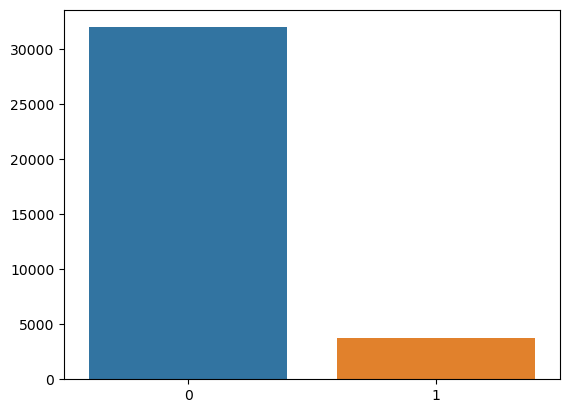

In [32]:
(unique, counts) = np.unique(cleaned_2011['JobTitle_Class'], return_counts=True)
print(unique, counts)
sns.barplot(x=unique, y = counts)
plt.show()

In [32]:
X = cleaned_2011.drop(columns=['TotalPay', 'JobTitle'])
y = cleaned_2011['TotalPay']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y)


In [34]:
#model = LogisticRegression(random_state=9)

In [35]:
#lr = model.fit(X_train, y_train)


In [36]:
#train_pred = model.predict(X_train)
#test_pred = lr.predict(X_test)

In [37]:
from sklearn.metrics import confusion_matrix


In [38]:
#training_matrix = confusion_matrix(y_train, train_pred)
#print(training_matrix)

In [39]:
#test_matrix = confusion_matrix(y_test, test_pred)
#print(test_matrix)

In [40]:
#train_report = classification_report(y_train, train_pred)
#print(train_report)

In [41]:
#test_report = classification_report(y_test, test_pred)
#print(test_report)

In [42]:
#print("Mean Squared Error:", mean_squared_error(y_test, test_pred))
#print("R^2 Score:", r2_score(y_test, test_pred))

In [43]:
#print("Mean Squared Error:", mean_squared_error(y_train, train_pred))
#print("R^2 Score:", r2_score(y_train, train_pred))

In [46]:
from sklearn.ensemble import RandomForestClassifier
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
#print(confusion_matrix(y_test, y_pred))
#print(classification_report(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 3.545233153397859e-22
R-squared: 1.0


In [47]:
from sklearn.model_selection import cross_val_score

# Assuming you've already defined X and y
model = LinearRegression()  # or RandomForestRegressor()

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculate the mean and standard deviation of the MSE
mean_mse = -cv_scores.mean()
std_mse = cv_scores.std()

print(f'Cross-Validated Mean MSE: {mean_mse}')
print(f'Cross-Validated MSE Standard Deviation: {std_mse}')

Cross-Validated Mean MSE: 1.187255390980465e-21
Cross-Validated MSE Standard Deviation: 1.5685299096864005e-21
